In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
video_games_data = pd.read_csv('video-game-sales.csv')

In [18]:
video_games_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Release_Decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990.0


In [ ]:
#

In [3]:
print(video_games_data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [ ]:
#The above code prints the number of missing values for each column in the dataset. The missing was analysed using 
# the dropping technique to drop rows/columns

In [9]:
# Load the dataset
df = pd.read_csv('video-game-sales.csv')

In [10]:
# Print the shape of the original DataFrame
print("Original DataFrame Shape:", df.shape)

Original DataFrame Shape: (16598, 11)


In [24]:
drop_na = video_games_data.dropna()
drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            16291 non-null  int64  
 1   Name            16291 non-null  object 
 2   Platform        16291 non-null  object 
 3   Year            16291 non-null  float64
 4   Genre           16291 non-null  object 
 5   Publisher       16291 non-null  object 
 6   NA_Sales        16291 non-null  float64
 7   EU_Sales        16291 non-null  float64
 8   JP_Sales        16291 non-null  float64
 9   Other_Sales     16291 non-null  float64
 10  Global_Sales    16291 non-null  float64
 11  Release_Decade  16291 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [11]:
# Drop rows with any missing values
df_rows_dropped = df.dropna(how='any')
print("\nRows Dropped:")
print("DataFrame Shape after dropping rows with any missing values:", df_rows_dropped.shape)


Rows Dropped:
DataFrame Shape after dropping rows with any missing values: (16291, 11)


In [12]:
# Drop columns with any missing values
df_cols_dropped = df.dropna(how='any', axis=1)
print("\nColumns Dropped:")
print("DataFrame Shape after dropping columns with any missing values:", df_cols_dropped.shape)


Columns Dropped:
DataFrame Shape after dropping columns with any missing values: (16598, 9)


In [14]:
# Drop rows with missing values in specific columns
columns_to_check = ['Rank', 'Name','Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',]
df_specific_rows_dropped = df.dropna(subset=columns_to_check)
print("\nSpecific Rows Dropped:")
print("DataFrame Shape after dropping rows with missing values in specific columns:", df_specific_rows_dropped.shape)


Specific Rows Dropped:
DataFrame Shape after dropping rows with missing values in specific columns: (16291, 11)


In [23]:
df = df.fillna(0)

In [26]:
def video_games_data(df):
    cols_with_missing_values = df.columns[df.isna().any()].tolist()

    for var in cols_with_missing_values:
        # extract a random sample
        video_games_data_df = df[var].dropna().sample(df[var].isnull().sum(), random_state=0)
        
        # re-index the randomly extracted sample
        video_games_data_df.index = df[df[var].isnull()].index
        
        # replace the NA
        df.loc[df[var].isnull(), var] = video_games_data_df
    
    return df

In [ ]:
#The above code defines a function called video_games_data that takes a pandas DataFrame df as input.
#The function first identifies the columns in the DataFrame that have missing values using the isna() method and the any() function.

In [32]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [35]:
df[df['Year']==0]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,0.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,0.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,0.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,0,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,0.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,0.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,0.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,0.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,0.0,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [38]:
df[df['Publisher']==0]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,0,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,0.0,Sports,0,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,0,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,0,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,0,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,0,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,0,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,0.0,Platform,0,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,0,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,0,0.30,0.11,0.00,0.01,0.42


In [39]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
#The above code saved my cleaned DataFrame as a CSV file named 'cleaned_data.csv' in my current working directory.

In [ ]:
#Question 4: What are the top 10 best-selling video games of all time across different regions 
#(North America, Europe, Japan, and other regions)?

In [48]:
top_games = df.groupby('Name').agg({'Global_Sales': 'sum'}).sort_values(by='Global_Sales', ascending=False) #Grouping the data by region and sort by global sales in descending order

In [49]:
top_10_games = top_games.head(10) #Next select the top 10 games

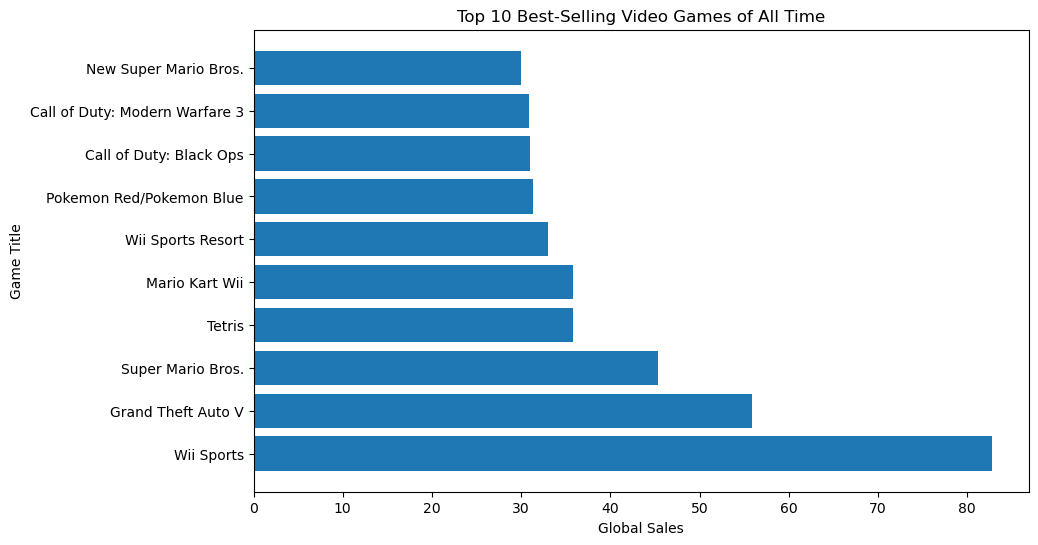

In [50]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_games.index, top_10_games['Global_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('Game Title')
plt.title('Top 10 Best-Selling Video Games of All Time')
plt.show()

In [ ]:
#Question 5: How have video game sales trends changed over the years, and which years saw the highest sales?

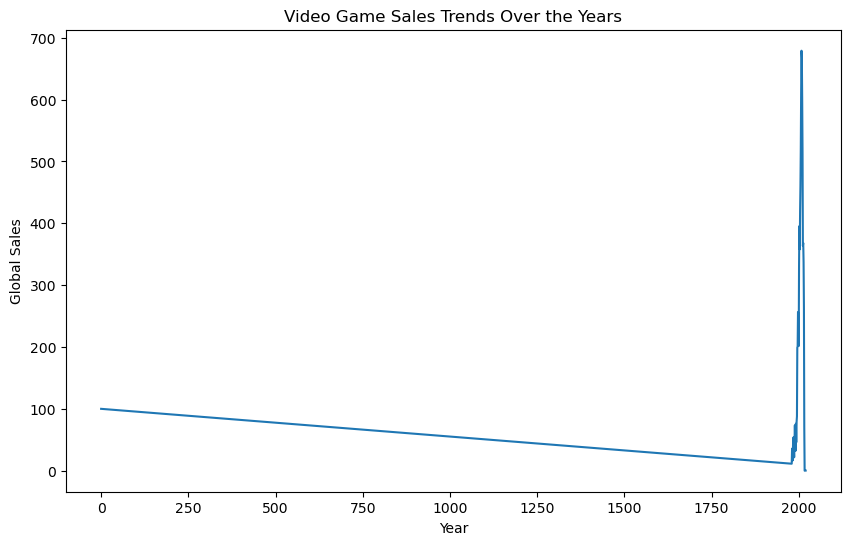

The year with the highest sales is 2008.0 with 678.9 global sales.


In [51]:
# Grouping the data by year and calculating the total global sales

yearly_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Plotting the yearly sales

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Video Game Sales Trends Over the Years')
plt.show()

# Finding the year with the highest sales

max_year = yearly_sales.loc[yearly_sales['Global_Sales'].idxmax()]
print(f'The year with the highest sales is {max_year["Year"]} with {max_year["Global_Sales"]} global sales.')

In [ ]:
#Question 6: Are there any correlations between a game's sales and its ranking, platform, genre, or publisher?

In [55]:
# Select only the numerical columns
numerical_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
numerical_df = df[numerical_cols]

# Calculate the correlation between the numerical columns
correlations = numerical_df.corr().sort_values(by='Global_Sales', ascending=False)

# Print the top 5 correlations
print('Top 5 correlations:')
print(correlations.head())

Top 5 correlations:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Global_Sales  0.941047  0.902836  0.611816     0.748331      1.000000
NA_Sales      1.000000  0.767727  0.449787     0.634737      0.941047
EU_Sales      0.767727  1.000000  0.435584     0.726385      0.902836
Other_Sales   0.634737  0.726385  0.290186     1.000000      0.748331
JP_Sales      0.449787  0.435584  1.000000     0.290186      0.611816


<Axes: title={'center': 'Scatter Plot between column1 and column2'}, xlabel='Global_Sales', ylabel='NA_Sales'>

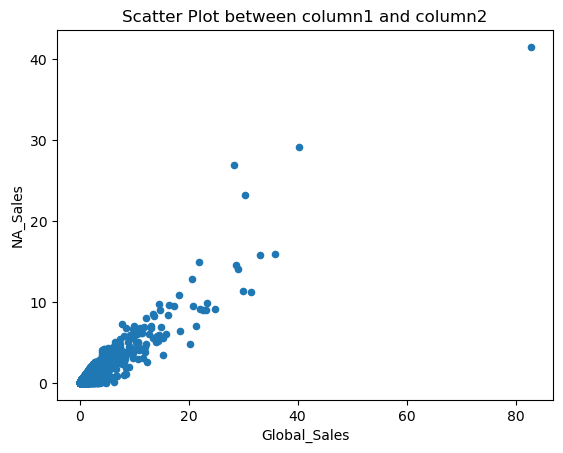

In [76]:
df.plot(kind='scatter', x='Global_Sales', y='NA_Sales', title='Scatter Plot between column1 and column2')

In [ ]:
#From the plot, there is a correlation between Global sales and sales in North America

<Axes: title={'center': 'Scatter Plot between column1 and column2'}, xlabel='Global_Sales', ylabel='EU_Sales'>

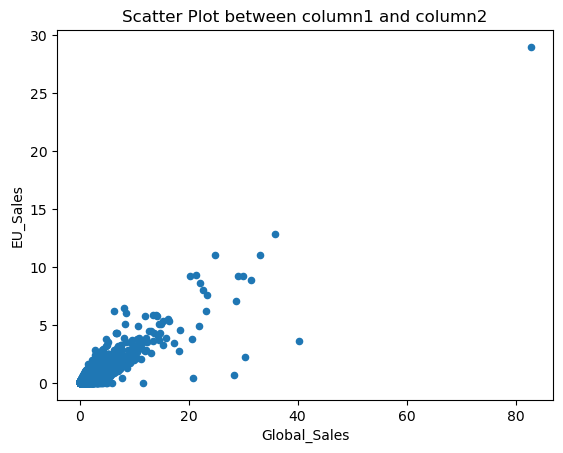

In [77]:
df.plot(kind='scatter', x='Global_Sales', y='EU_Sales', title='Scatter Plot between column1 and column2')

In [ ]:
#From the plot, there is a correlation between Global sales and sales in EU sales

<Axes: title={'center': 'Scatter Plot between column1 and column2'}, xlabel='Global_Sales', ylabel='JP_Sales'>

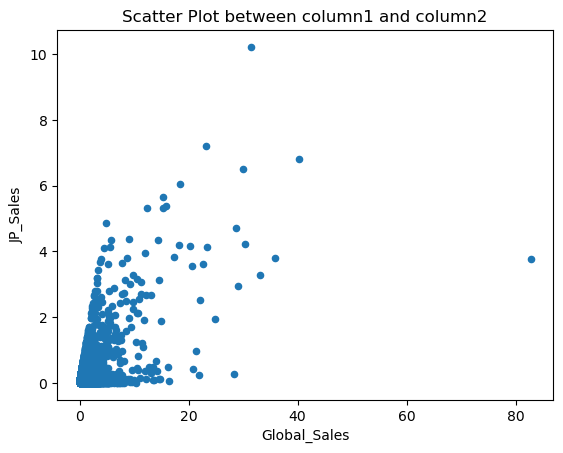

In [78]:
df.plot(kind='scatter', x='Global_Sales', y='JP_Sales', title='Scatter Plot between column1 and column2')

In [ ]:
#From the plot, there is a correlation between Global sales and sales in japan

<Axes: title={'center': 'Scatter Plot between column1 and column2'}, xlabel='Global_Sales', ylabel='Other_Sales'>

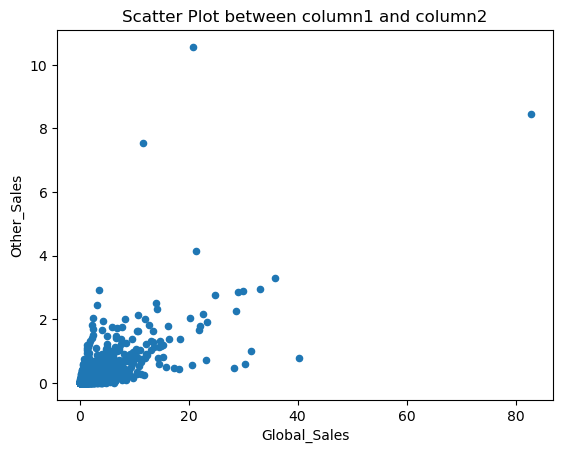

In [79]:
df.plot(kind='scatter', x='Global_Sales', y='Other_Sales', title='Scatter Plot between column1 and column2')

In [ ]:
#From the plot, there is a correlation between Global sales and other part of the world

In [ ]:
#Question 7: Which video game franchises or series have consistently high sales across multiple releases?

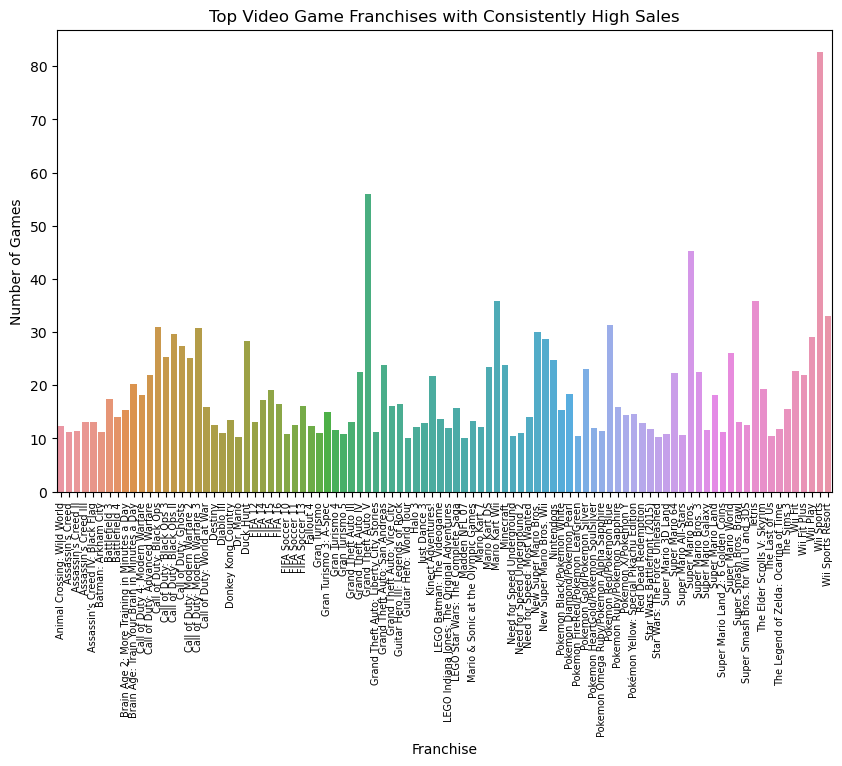

In [87]:
# I firsyt grouped the franchises by name and calculate the size of each group
grouped = franchises.groupby('Name')['Global_Sales'].sum().reset_index(name='count')

# Filter franchises with more than 10 games
top_franchises = grouped[grouped['count'] > 10]

# Plot the top franchises
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='count', data=top_franchises)
plt.xlabel('Franchise')
plt.xticks(rotation = 90, fontsize = 7)
plt.ylabel('Number of Games')
plt.title('Top Video Game Franchises with Consistently High Sales')
plt.show()